# Libraries Importing

In [400]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

import joblib
import streamlit as st 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA,KernelPCA,SparsePCA,IncrementalPCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score

from sklearn.metrics import (recall_score,roc_auc_score, 
                             confusion_matrix,roc_curve,
                             classification_report,)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Loading Data

In [401]:
filepath = "../assets/data/Telco.csv"
def getpath()->str:
    return pd.read_csv(filepath)


df = getpath()

# Info About Data

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [403]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [404]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [405]:
df.shape

(7043, 21)

In [406]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [407]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [408]:
df.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [409]:
df.duplicated().sum()

np.int64(0)

In [410]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Mainpulation / Preprocessing 

In [411]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [412]:
df = df.drop(['customerID'], axis = 1)

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [414]:
imputer = SimpleImputer(strategy='mean')

In [415]:
num_cols = df.select_dtypes( include = ['int64','float64'] ).columns.to_list()
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [416]:
df[num_cols]= imputer.fit_transform(df[num_cols])

In [417]:
df.isnull().sum().sum()

np.int64(0)

# Visualization

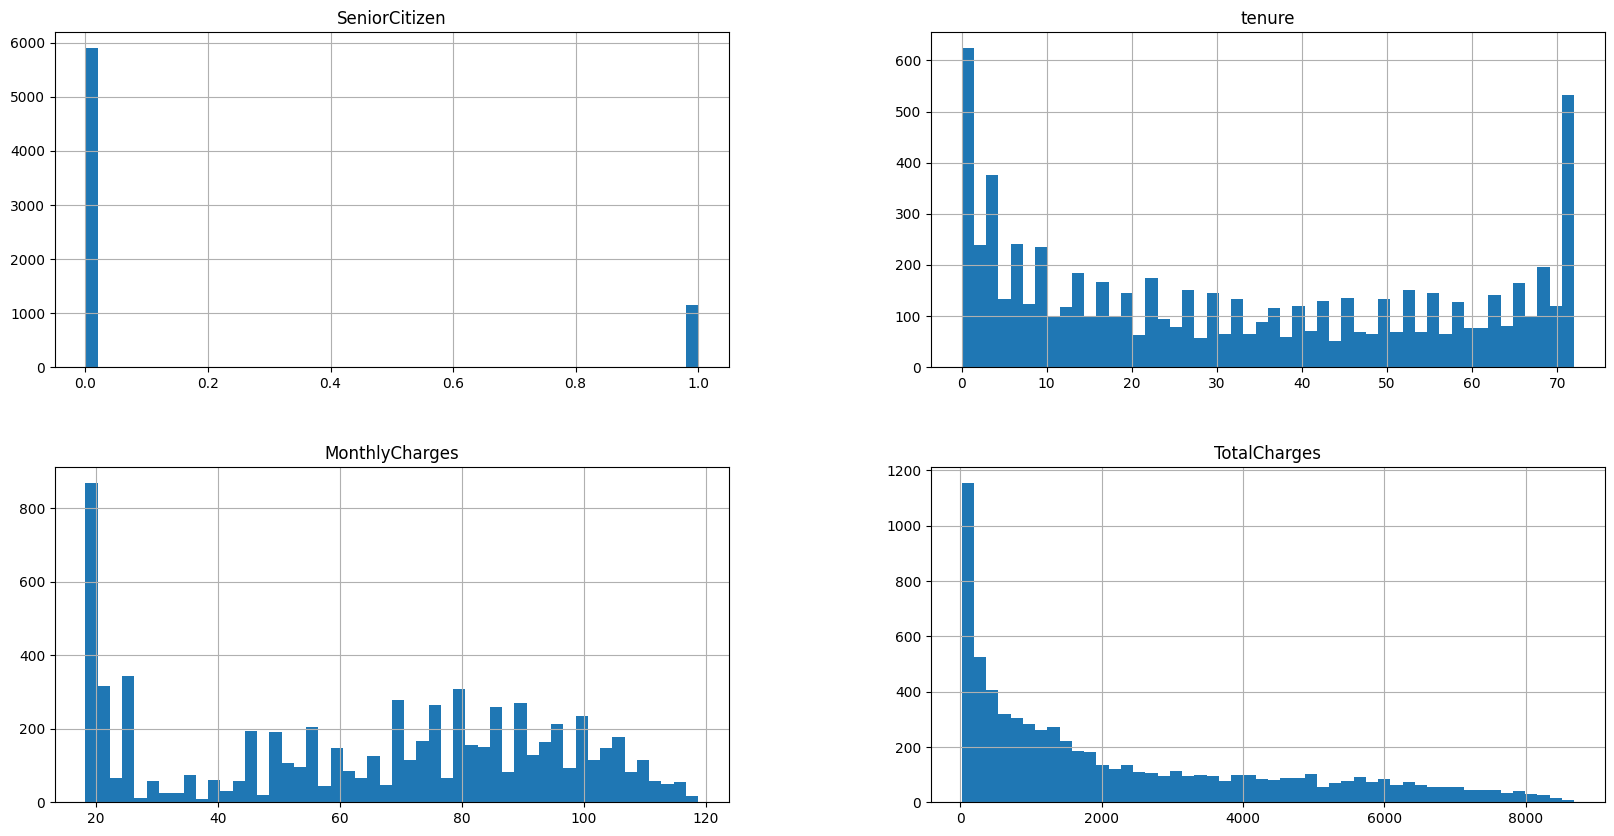

In [418]:
df.hist( bins = 50, figsize=(20,10) )
plt.show()

# Correlation Matrix 

In [419]:
corr_matrix = df[num_cols].corr()
corr_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102395
tenure,0.016567,1.000000,0.247900,0.824757
MonthlyCharges,0.220173,0.247900,1.000000,0.650468
TotalCharges,0.102395,0.824757,0.650468,1.000000


# Heat Map

<Axes: >

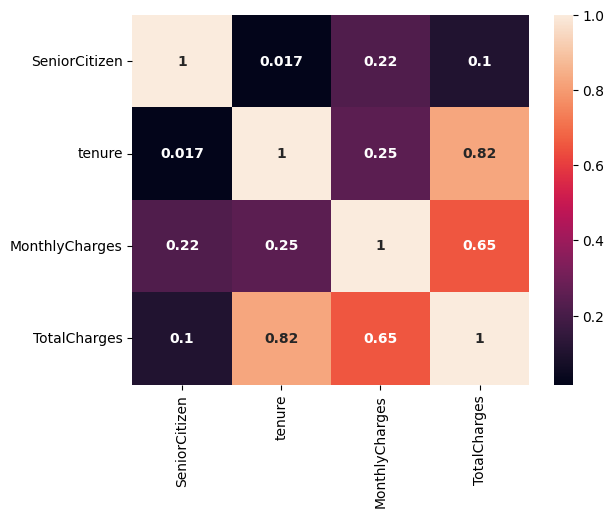

In [420]:
plt.Figure( figsize = (14,12) )
sns.heatmap( corr_matrix, annot=True ,annot_kws={
    "weight":"bold",
        "size":10,
                })

In [421]:
Scaler=StandardScaler()
OH = OneHotEncoder(handle_unknown='ignore')
le = LabelEncoder()

In [422]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [423]:
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
preprocessor = ColumnTransformer([
   ('Num', Scaler, num_cols),
   ('Cat', OH, cat_cols)
])

# temp

In [425]:
df['gender'] = df['gender'].str.strip().str.lower()

# Splitting Data

In [426]:
y = le.fit_transform(y)

In [427]:
x_processed = preprocessor.fit_transform(X)

In [428]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42, stratify=y)

In [429]:
X_train_processed = preprocessor.fit_transform(x_train) 
X_test_processed = preprocessor.transform(x_test)     

len(x_train), len(x_test), len(y_train), len(y_test)

(5775, 1268, 5775, 1268)

# Imbalanced Dataset Techniques

In [430]:
tom = TomekLinks()
sm = SMOTE(random_state=42)
mix = SMOTETomek(random_state=42)

# Cross Validation Technique

In [431]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
s_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train / Cross Validation / Imbalance Dataset Techniques  / Deploy

In [ ]:
def evaluate_with_resampling(technique,model):
    x_imb, y_imb = technique.fit_resample(X_train_processed,y_train)
    model.fit(x_imb,y_imb)
    y_pred=model.predict(X_test_processed)
    recall = recall_score(y_test, y_pred)
    return recall

In [ ]:
def create_model_pipeline(model):
    num_transform = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', Scaler)
    ])

    cat_transform = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OH)
    ])

    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    model_pipeline.fit(x_train, y_train)
    joblib.dump(model_pipeline, "../Model/model.pkl")

In [524]:
def train_and_dep(model,CV,title,deploy=False):
    best_recall = -1
    best_method = ""        
    
    cv_score=cross_val_score(model, X_train_processed,y_train,cv=CV)

    recall=evaluate_with_resampling(tom,model)
    print(f"Recall for {title} using tomek:",recall)
    if recall > best_recall:
        best_recall = recall
        best_method = "Tomek"
    print("___________________________________________________\n")

    recall = evaluate_with_resampling(sm,model)
    print(f"Recall for {title} using smotes:",recall)
    if recall > best_recall:
        best_recall = recall
        best_method = "Smote"
    print("___________________________________________________\n")
    
    recall=evaluate_with_resampling(mix,model)
    print(f"Recall for {title} smotetomek:",recall)
    if recall > best_recall:
        best_recall = recall
        best_method = "Smote_Tomek"    
    print("___________________________________________________\n")
   

    if deploy and best_method:
        create_model_pipeline(model)
        le.fit(df['Churn'])
        print("Model saved ✅")
    else:
         pass

- ----------------------------------------------------------

- ----------------------------------------------------------

# SVC (non-linear)

In [435]:
SVC_NL1 = SVC(random_state=42,class_weight='balanced')
SVC_NL2 = SVC(random_state=42,class_weight='balanced')
SVC_NL3 = SVC(random_state=42,class_weight='balanced')
SVC_NL4 = SVC(random_state=42,class_weight='balanced')
SVC_NL5 = SVC(random_state=42,class_weight='balanced')


SVC_NL_PCA = Pipeline([
    ('PCA', PCA(n_components=2)),
    ('clf',SVC_NL2)
])

SVC_NL_KPCA = Pipeline([
    ('PCA', KernelPCA (n_components=2 , kernel='rbf', gamma= 0.5)),
    ('clf',SVC_NL3)
])

SVC_NL_SPCA = Pipeline([
    ('PCA',SparsePCA (n_components=2 , random_state= 42 )),
    ('clf',SVC_NL4)
])

SVC_NL_IPCA = Pipeline([
    ('PCA',IncrementalPCA (n_components=2 , batch_size= 10)),
    ('clf',SVC_NL5)
])

In [436]:
train_and_dep(SVC_NL1,kf,"SVC (No PCA applied)")

Recall for SVC (No PCA applied) using tomek: 0.7827380952380952
___________________________________________________

Recall for SVC (No PCA applied) using smotes: 0.7232142857142857
___________________________________________________

Recall for SVC (No PCA applied) smotetomek: 0.7202380952380952
___________________________________________________



In [437]:
train_and_dep(SVC_NL_PCA,kf,"SVC (PCA applied)")

Recall for SVC (PCA applied) using tomek: 0.7857142857142857
___________________________________________________

Recall for SVC (PCA applied) using smotes: 0.7738095238095238
___________________________________________________

Recall for SVC (PCA applied) smotetomek: 0.7738095238095238
___________________________________________________



In [438]:
train_and_dep(SVC_NL_KPCA,kf,"SVC (Kernel PCA applied)")

Recall for SVC (Kernel PCA applied) using tomek: 0.38392857142857145
___________________________________________________

Recall for SVC (Kernel PCA applied) using smotes: 0.5089285714285714
___________________________________________________

Recall for SVC (Kernel PCA applied) smotetomek: 0.5267857142857143
___________________________________________________



In [440]:
train_and_dep(SVC_NL_SPCA,kf,"SVC (Sparse  PCA applied)")

Recall for SVC (Sparse  PCA applied) using tomek: 0.7916666666666666
___________________________________________________

Recall for SVC (Sparse  PCA applied) using smotes: 0.7738095238095238
___________________________________________________

Recall for SVC (Sparse  PCA applied) smotetomek: 0.7767857142857143
___________________________________________________



In [441]:
train_and_dep(SVC_NL_IPCA,kf,"SVC (Incremental PCA applied)")

Recall for SVC (Incremental PCA applied) using tomek: 0.7886904761904762
___________________________________________________

Recall for SVC (Incremental PCA applied) using smotes: 0.7738095238095238
___________________________________________________

Recall for SVC (Incremental PCA applied) smotetomek: 0.7767857142857143
___________________________________________________



- --------------------------------------------------------------------------

- -------------------------------------------------------------------------

In [442]:
train_and_dep(SVC_NL1,s_kf,"SVC (No PCA applied)")

Recall for SVC (No PCA applied) using tomek: 0.7827380952380952
___________________________________________________

Recall for SVC (No PCA applied) using smotes: 0.7232142857142857
___________________________________________________

Recall for SVC (No PCA applied) smotetomek: 0.7202380952380952
___________________________________________________



In [443]:
train_and_dep(SVC_NL_PCA,s_kf,"SVC (PCA applied)")

Recall for SVC (PCA applied) using tomek: 0.7857142857142857
___________________________________________________

Recall for SVC (PCA applied) using smotes: 0.7738095238095238
___________________________________________________

Recall for SVC (PCA applied) smotetomek: 0.7738095238095238
___________________________________________________



In [444]:
train_and_dep(SVC_NL_KPCA,s_kf,"SVC (Kernel PCA applied)")

Recall for SVC (Kernel PCA applied) using tomek: 0.38392857142857145
___________________________________________________

Recall for SVC (Kernel PCA applied) using smotes: 0.5089285714285714
___________________________________________________

Recall for SVC (Kernel PCA applied) smotetomek: 0.5267857142857143
___________________________________________________



In [445]:
train_and_dep(SVC_NL_SPCA,s_kf,"SVC (Sparse  PCA applied)")

Recall for SVC (Sparse  PCA applied) using tomek: 0.7916666666666666
___________________________________________________

Recall for SVC (Sparse  PCA applied) using smotes: 0.7738095238095238
___________________________________________________

Recall for SVC (Sparse  PCA applied) smotetomek: 0.7767857142857143
___________________________________________________



In [446]:
train_and_dep(SVC_NL_IPCA,s_kf,"SVC (Incremental PCA applied)")

Recall for SVC (Incremental PCA applied) using tomek: 0.7886904761904762
___________________________________________________

Recall for SVC (Incremental PCA applied) using smotes: 0.7738095238095238
___________________________________________________

Recall for SVC (Incremental PCA applied) smotetomek: 0.7767857142857143
___________________________________________________



- ------------------------------------------------------------------

- ---------------------------------------------------------------------------------

- -----------------------------------------------------------------------------------------------

# Linear SVC 

In [447]:
SVC_L1 =LinearSVC(class_weight='balanced') 
SVC_L2 =LinearSVC(class_weight='balanced') 
SVC_L3 =LinearSVC(class_weight='balanced') 
SVC_L4 =LinearSVC(class_weight='balanced') 
SVC_L5 =LinearSVC(class_weight='balanced') 


SVC_L_PCA = Pipeline([
    ('PCA', PCA(n_components=2)),
    ('clf',SVC_L2)
])

SVC_L_KPCA = Pipeline([
    ('PCA', KernelPCA (n_components=2 , kernel='rbf', gamma= 0.5)),
    ('clf',SVC_L3)
])

SVC_L_SPCA = Pipeline([
    ('PCA',SparsePCA (n_components=2 , random_state= 42 )),
    ('clf',SVC_L4)
])

SVC_L_IPCA = Pipeline([
    ('PCA',IncrementalPCA (n_components=2 , batch_size= 10)),
    ('clf',SVC_L5)
])

In [448]:
train_and_dep(SVC_L1,kf,'Linear SVC (No PCA applied)') 

Recall for Linear SVC (No PCA applied) using tomek: 0.8035714285714286
___________________________________________________

Recall for Linear SVC (No PCA applied) using smotes: 0.7767857142857143
___________________________________________________

Recall for Linear SVC (No PCA applied) smotetomek: 0.7827380952380952
___________________________________________________



In [449]:
train_and_dep(SVC_L_PCA,kf,'Linear SVC (PCA applied)') 

Recall for Linear SVC (PCA applied) using tomek: 0.8065476190476191
___________________________________________________

Recall for Linear SVC (PCA applied) using smotes: 0.7976190476190477
___________________________________________________

Recall for Linear SVC (PCA applied) smotetomek: 0.7976190476190477
___________________________________________________



In [450]:
train_and_dep(SVC_L_KPCA,kf,'Linear SVC (Kernel (rbf) PCA applied)') 

Recall for Linear SVC (Kernel (rbf) PCA applied) using tomek: 0.9672619047619048
___________________________________________________

Recall for Linear SVC (Kernel (rbf) PCA applied) using smotes: 0.3125
___________________________________________________

Recall for Linear SVC (Kernel (rbf) PCA applied) smotetomek: 0.3392857142857143
___________________________________________________



In [451]:
train_and_dep(SVC_L_SPCA,kf,'Linear SVC (Sparse PCA applied)') 

Recall for Linear SVC (Sparse PCA applied) using tomek: 0.8065476190476191
___________________________________________________

Recall for Linear SVC (Sparse PCA applied) using smotes: 0.7916666666666666
___________________________________________________

Recall for Linear SVC (Sparse PCA applied) smotetomek: 0.7946428571428571
___________________________________________________



In [452]:
train_and_dep(SVC_L_IPCA,kf,'Linear SVC (Incremental PCA applied)') 

Recall for Linear SVC (Incremental PCA applied) using tomek: 0.8035714285714286
___________________________________________________

Recall for Linear SVC (Incremental PCA applied) using smotes: 0.7946428571428571
___________________________________________________

Recall for Linear SVC (Incremental PCA applied) smotetomek: 0.7946428571428571
___________________________________________________



- ------------------------------------------------------------------------------------

- -------------------------------------------------------------------------------------

In [453]:
train_and_dep(SVC_L1,s_kf,'Linear SVC (No PCA applied)') 

Recall for Linear SVC (No PCA applied) using tomek: 0.8035714285714286
___________________________________________________

Recall for Linear SVC (No PCA applied) using smotes: 0.7767857142857143
___________________________________________________

Recall for Linear SVC (No PCA applied) smotetomek: 0.7827380952380952
___________________________________________________



In [454]:
train_and_dep(SVC_L_PCA,s_kf,'Linear SVC (PCA applied)') 

Recall for Linear SVC (PCA applied) using tomek: 0.8065476190476191
___________________________________________________

Recall for Linear SVC (PCA applied) using smotes: 0.7976190476190477
___________________________________________________

Recall for Linear SVC (PCA applied) smotetomek: 0.7976190476190477
___________________________________________________



In [525]:
train_and_dep(SVC_L_KPCA,s_kf,'Linear SVC (Kernel (rbf) PCA applied)',deploy=True) 

Recall for Linear SVC (Kernel (rbf) PCA applied) using tomek: 0.9672619047619048
___________________________________________________

Recall for Linear SVC (Kernel (rbf) PCA applied) using smotes: 0.3125
___________________________________________________

Recall for Linear SVC (Kernel (rbf) PCA applied) smotetomek: 0.3392857142857143
___________________________________________________

Model saved ✅


In [456]:
train_and_dep(SVC_L_SPCA,s_kf,'Linear SVC (Sparse  PCA applied)') 

Recall for Linear SVC (Sparse  PCA applied) using tomek: 0.8065476190476191
___________________________________________________

Recall for Linear SVC (Sparse  PCA applied) using smotes: 0.7916666666666666
___________________________________________________

Recall for Linear SVC (Sparse  PCA applied) smotetomek: 0.7946428571428571
___________________________________________________



In [457]:
train_and_dep(SVC_L_IPCA,s_kf,'Linear SVC (Incremental PCA applied)') 

Recall for Linear SVC (Incremental PCA applied) using tomek: 0.8035714285714286
___________________________________________________

Recall for Linear SVC (Incremental PCA applied) using smotes: 0.7946428571428571
___________________________________________________

Recall for Linear SVC (Incremental PCA applied) smotetomek: 0.7946428571428571
___________________________________________________



- ---------------------------------------------------------------------

- -----------------------------------------------------------------------------------------------

- ----------------------------------------------------------

# KNN

In [458]:
KNN1=KNeighborsClassifier(n_neighbors=5)
KNN2=KNeighborsClassifier(n_neighbors=5)
KNN3=KNeighborsClassifier(n_neighbors=5)
KNN4=KNeighborsClassifier(n_neighbors=5)
KNN5=KNeighborsClassifier(n_neighbors=5)


KNN_PCA = Pipeline([
    ('PCA', PCA(n_components=2)),
    ('clf',KNN2)
])

KNN_KPCA = Pipeline([
    ('PCA', KernelPCA (n_components=2 , kernel='rbf', gamma= 0.5)),
    ('clf',KNN2)
])

KNN_SPCA = Pipeline([
    ('PCA',SparsePCA (n_components=2 , random_state= 42 )),
    ('clf',KNN2)
])

KNN_IPCA = Pipeline([
    ('PCA',IncrementalPCA (n_components=2 , batch_size= 10)),
    ('clf',KNN2)
])


In [459]:
train_and_dep(KNN1, kf,"KNN (No PCA applied)")

Recall for KNN (No PCA applied) using tomek: 0.6488095238095238
___________________________________________________

Recall for KNN (No PCA applied) using smotes: 0.7261904761904762
___________________________________________________

Recall for KNN (No PCA applied) smotetomek: 0.7380952380952381
___________________________________________________



In [460]:
train_and_dep(KNN_PCA, kf,"KNN (PCA applied)")

Recall for KNN (PCA applied) using tomek: 0.5654761904761905
___________________________________________________

Recall for KNN (PCA applied) using smotes: 0.7142857142857143
___________________________________________________

Recall for KNN (PCA applied) smotetomek: 0.7202380952380952
___________________________________________________



In [461]:
train_and_dep(KNN_KPCA, kf,"KNN (Kernel PCA applied)")

Recall for KNN (Kernel PCA applied) using tomek: 0.4642857142857143
___________________________________________________

Recall for KNN (Kernel PCA applied) using smotes: 0.6636904761904762
___________________________________________________

Recall for KNN (Kernel PCA applied) smotetomek: 0.6547619047619048
___________________________________________________



In [462]:
train_and_dep(KNN_SPCA, kf,"KNN (Sparse PCA applied)")

Recall for KNN (Sparse PCA applied) using tomek: 0.5446428571428571
___________________________________________________

Recall for KNN (Sparse PCA applied) using smotes: 0.7321428571428571
___________________________________________________

Recall for KNN (Sparse PCA applied) smotetomek: 0.7291666666666666
___________________________________________________



In [463]:
train_and_dep(KNN_IPCA, kf,"KNN (Incremental PCA applied)")

Recall for KNN (Incremental PCA applied) using tomek: 0.5625
___________________________________________________

Recall for KNN (Incremental PCA applied) using smotes: 0.7053571428571429
___________________________________________________

Recall for KNN (Incremental PCA applied) smotetomek: 0.7142857142857143
___________________________________________________



- -----------------------------------------------------------------------------------------

- --------------------------------------------------------------------------------

In [464]:
train_and_dep(KNN1, s_kf,"KNN (No PCA applied)")

Recall for KNN (No PCA applied) using tomek: 0.6488095238095238
___________________________________________________

Recall for KNN (No PCA applied) using smotes: 0.7261904761904762
___________________________________________________

Recall for KNN (No PCA applied) smotetomek: 0.7380952380952381
___________________________________________________



In [465]:
train_and_dep(KNN_PCA, s_kf,"KNN (PCA applied)")

Recall for KNN (PCA applied) using tomek: 0.5654761904761905
___________________________________________________

Recall for KNN (PCA applied) using smotes: 0.7142857142857143
___________________________________________________

Recall for KNN (PCA applied) smotetomek: 0.7202380952380952
___________________________________________________



In [466]:
train_and_dep(KNN_KPCA, s_kf,"KNN (Kernel PCA applied)")

Recall for KNN (Kernel PCA applied) using tomek: 0.4642857142857143
___________________________________________________

Recall for KNN (Kernel PCA applied) using smotes: 0.6636904761904762
___________________________________________________

Recall for KNN (Kernel PCA applied) smotetomek: 0.6547619047619048
___________________________________________________



In [467]:
train_and_dep(KNN_SPCA, s_kf,"KNN (Sparse PCA applied)")

Recall for KNN (Sparse PCA applied) using tomek: 0.5446428571428571
___________________________________________________

Recall for KNN (Sparse PCA applied) using smotes: 0.7321428571428571
___________________________________________________

Recall for KNN (Sparse PCA applied) smotetomek: 0.7291666666666666
___________________________________________________



In [468]:
train_and_dep(KNN_IPCA, s_kf,"KNN (Incremental PCA applied)")

Recall for KNN (Incremental PCA applied) using tomek: 0.5625
___________________________________________________

Recall for KNN (Incremental PCA applied) using smotes: 0.7053571428571429
___________________________________________________

Recall for KNN (Incremental PCA applied) smotetomek: 0.7142857142857143
___________________________________________________



- ----------------------------------------------------------

- ---------------------------------------------------------------------------------------

- ----------------------------------------------------------

# Logistic 

In [469]:
LR1 = LogisticRegression(class_weight='balanced')
LR2 = LogisticRegression(class_weight='balanced')
LR3 = LogisticRegression(class_weight='balanced')
LR4 = LogisticRegression(class_weight='balanced')
LR5 = LogisticRegression(class_weight='balanced')

LR_PCA = Pipeline([
    ('PCA', PCA(n_components=2)),
    ('clf',LR2)
])

LR_KPCA = Pipeline([
    ('PCA', KernelPCA (n_components=2 , kernel='rbf', gamma= 0.5)),
    ('clf',LR3)
])

LR_SPCA = Pipeline([
    ('PCA',SparsePCA (n_components=2 , random_state= 42 )),
    ('clf',LR4)
])

LR_IPCA = Pipeline([
    ('PCA',IncrementalPCA (n_components=2 , batch_size= 10)),
    ('clf',LR5)
])

In [470]:
train_and_dep(LR1,kf,"Logistic (No PCA applied)")

Recall for Logistic (No PCA applied) using tomek: 0.8005952380952381
___________________________________________________

Recall for Logistic (No PCA applied) using smotes: 0.7767857142857143
___________________________________________________

Recall for Logistic (No PCA applied) smotetomek: 0.7767857142857143
___________________________________________________



In [471]:
train_and_dep(LR_PCA,kf,"Logistic (PCA applied)")

Recall for Logistic (PCA applied) using tomek: 0.8065476190476191
___________________________________________________

Recall for Logistic (PCA applied) using smotes: 0.7916666666666666
___________________________________________________

Recall for Logistic (PCA applied) smotetomek: 0.7946428571428571
___________________________________________________



In [472]:
train_and_dep(LR_KPCA,kf,"Logistic (Kernel PCA applied)")

Recall for Logistic (Kernel PCA applied) using tomek: 0.9642857142857143
___________________________________________________

Recall for Logistic (Kernel PCA applied) using smotes: 0.3482142857142857
___________________________________________________

Recall for Logistic (Kernel PCA applied) smotetomek: 0.3601190476190476
___________________________________________________



In [473]:
train_and_dep(LR_SPCA,kf,"Logistic (Sparse PCA applied)")

Recall for Logistic (Sparse PCA applied) using tomek: 0.8065476190476191
___________________________________________________

Recall for Logistic (Sparse PCA applied) using smotes: 0.7886904761904762
___________________________________________________

Recall for Logistic (Sparse PCA applied) smotetomek: 0.7946428571428571
___________________________________________________



In [474]:
train_and_dep(LR_IPCA,kf,"Logistic (Incremental PCA applied)")

Recall for Logistic (Incremental PCA applied) using tomek: 0.8065476190476191
___________________________________________________

Recall for Logistic (Incremental PCA applied) using smotes: 0.7857142857142857
___________________________________________________

Recall for Logistic (Incremental PCA applied) smotetomek: 0.7886904761904762
___________________________________________________



- --------------------------------------------------------------------------------------------

- ----------------------------------------------------------------------

In [475]:
train_and_dep(LR1,s_kf,"Logistic (No PCA applied)")

Recall for Logistic (No PCA applied) using tomek: 0.8005952380952381
___________________________________________________

Recall for Logistic (No PCA applied) using smotes: 0.7767857142857143
___________________________________________________

Recall for Logistic (No PCA applied) smotetomek: 0.7767857142857143
___________________________________________________



In [476]:
train_and_dep(LR_PCA,s_kf,"Logistic (PCA applied)")

Recall for Logistic (PCA applied) using tomek: 0.8065476190476191
___________________________________________________

Recall for Logistic (PCA applied) using smotes: 0.7916666666666666
___________________________________________________

Recall for Logistic (PCA applied) smotetomek: 0.7946428571428571
___________________________________________________



In [477]:
train_and_dep(LR_KPCA,s_kf,"Logistic (Kernel PCA applied)")

Recall for Logistic (Kernel PCA applied) using tomek: 0.9642857142857143
___________________________________________________

Recall for Logistic (Kernel PCA applied) using smotes: 0.3482142857142857
___________________________________________________

Recall for Logistic (Kernel PCA applied) smotetomek: 0.3601190476190476
___________________________________________________



In [478]:
train_and_dep(LR_SPCA,s_kf,"Logistic (Sparse PCA applied)")

Recall for Logistic (Sparse PCA applied) using tomek: 0.8065476190476191
___________________________________________________

Recall for Logistic (Sparse PCA applied) using smotes: 0.7886904761904762
___________________________________________________

Recall for Logistic (Sparse PCA applied) smotetomek: 0.7946428571428571
___________________________________________________



In [479]:
train_and_dep(LR_IPCA,s_kf,"Logistic (Incremental PCA applied)")

Recall for Logistic (Incremental PCA applied) using tomek: 0.8065476190476191
___________________________________________________

Recall for Logistic (Incremental PCA applied) using smotes: 0.7857142857142857
___________________________________________________

Recall for Logistic (Incremental PCA applied) smotetomek: 0.7886904761904762
___________________________________________________



- ----------------------------------------------------------

- --------------------------------------------------------------------

- ----------------------------------------------------------

# Decision Tree ( entropy )

In [480]:
D_T_E1 = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
D_T_E2 = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
D_T_E3 = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
D_T_E4 = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
D_T_E5 = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)



D_T_E_PCA = Pipeline([
    ('PCA', PCA(n_components=2)),
    ('clf',D_T_E2)
])

D_T_E_KPCA = Pipeline([
    ('PCA', KernelPCA (n_components=2 , kernel='rbf', gamma= 0.5)),
    ('clf',D_T_E3)
])

D_T_E_SPCA = Pipeline([
    ('PCA',SparsePCA (n_components=2 , random_state= 42 )),
    ('clf',D_T_E4)
])

D_T_E_IPCA = Pipeline([
    ('PCA',IncrementalPCA (n_components=2)),
    ('clf',D_T_E5)
])

In [481]:
train_and_dep(D_T_E1,kf,"Decision Tree (entropy) (No PCA applied)")

Recall for Decision Tree (entropy) (No PCA applied) using tomek: 0.35714285714285715
___________________________________________________

Recall for Decision Tree (entropy) (No PCA applied) using smotes: 0.7440476190476191
___________________________________________________

Recall for Decision Tree (entropy) (No PCA applied) smotetomek: 0.7440476190476191
___________________________________________________



In [482]:
train_and_dep(D_T_E_PCA,kf,"Decision Tree (entropy) (PCA applied)")

Recall for Decision Tree (entropy) (PCA applied) using tomek: 0.5416666666666666
___________________________________________________

Recall for Decision Tree (entropy) (PCA applied) using smotes: 0.7232142857142857
___________________________________________________

Recall for Decision Tree (entropy) (PCA applied) smotetomek: 0.6875
___________________________________________________



In [483]:
train_and_dep(D_T_E_KPCA,kf,"Decision Tree (entropy) (Kernel PCA applied)")

Recall for Decision Tree (entropy) (Kernel PCA applied) using tomek: 0.27976190476190477
___________________________________________________

Recall for Decision Tree (entropy) (Kernel PCA applied) using smotes: 0.6577380952380952
___________________________________________________

Recall for Decision Tree (entropy) (Kernel PCA applied) smotetomek: 0.6696428571428571
___________________________________________________



In [484]:
train_and_dep(D_T_E_SPCA,kf,"Decision Tree (entropy) (Sparse PCA applied)")

Recall for Decision Tree (entropy) (Sparse PCA applied) using tomek: 0.6101190476190477
___________________________________________________

Recall for Decision Tree (entropy) (Sparse PCA applied) using smotes: 0.7261904761904762
___________________________________________________

Recall for Decision Tree (entropy) (Sparse PCA applied) smotetomek: 0.6875
___________________________________________________



In [485]:
train_and_dep(D_T_E_IPCA,kf,"Decision Tree (entropy) (Incremental PCA applied)")

Recall for Decision Tree (entropy) (Incremental PCA applied) using tomek: 0.5446428571428571
___________________________________________________

Recall for Decision Tree (entropy) (Incremental PCA applied) using smotes: 0.7232142857142857
___________________________________________________

Recall for Decision Tree (entropy) (Incremental PCA applied) smotetomek: 0.7202380952380952
___________________________________________________



- -------------------------------------------------------------------------------

- ---------------------------------------------------------------------------------------

In [486]:
train_and_dep(D_T_E1,s_kf,"Decision Tree (entropy) (No PCA applied)")

Recall for Decision Tree (entropy) (No PCA applied) using tomek: 0.35714285714285715
___________________________________________________

Recall for Decision Tree (entropy) (No PCA applied) using smotes: 0.7440476190476191
___________________________________________________

Recall for Decision Tree (entropy) (No PCA applied) smotetomek: 0.7440476190476191
___________________________________________________



In [487]:
train_and_dep(D_T_E_PCA,s_kf,"Decision Tree (entropy) (PCA applied)")

Recall for Decision Tree (entropy) (PCA applied) using tomek: 0.5416666666666666
___________________________________________________

Recall for Decision Tree (entropy) (PCA applied) using smotes: 0.7232142857142857
___________________________________________________

Recall for Decision Tree (entropy) (PCA applied) smotetomek: 0.6875
___________________________________________________



In [488]:
train_and_dep(D_T_E_KPCA,s_kf,"Decision Tree (entropy) (Kernel PCA applied)")

Recall for Decision Tree (entropy) (Kernel PCA applied) using tomek: 0.27976190476190477
___________________________________________________

Recall for Decision Tree (entropy) (Kernel PCA applied) using smotes: 0.6577380952380952
___________________________________________________

Recall for Decision Tree (entropy) (Kernel PCA applied) smotetomek: 0.6696428571428571
___________________________________________________



In [489]:
train_and_dep(D_T_E_SPCA,s_kf,"Decision Tree (entropy) (Sparse PCA applied)")

Recall for Decision Tree (entropy) (Sparse PCA applied) using tomek: 0.6101190476190477
___________________________________________________

Recall for Decision Tree (entropy) (Sparse PCA applied) using smotes: 0.7261904761904762
___________________________________________________

Recall for Decision Tree (entropy) (Sparse PCA applied) smotetomek: 0.6875
___________________________________________________



In [490]:
train_and_dep(D_T_E_IPCA,s_kf,"Decision Tree (entropy) (Incremental PCA applied)")

Recall for Decision Tree (entropy) (Incremental PCA applied) using tomek: 0.5446428571428571
___________________________________________________

Recall for Decision Tree (entropy) (Incremental PCA applied) using smotes: 0.7232142857142857
___________________________________________________

Recall for Decision Tree (entropy) (Incremental PCA applied) smotetomek: 0.7202380952380952
___________________________________________________



- ----------------------------------------------------------

- --------------------------------------------------------------------------------------------

- ----------------------------------------------------------

# Decision Tree ( gini )

In [491]:
D_T_G1 = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=42)
D_T_G2 = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=42)
D_T_G3 = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=42)
D_T_G4 = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=42)
D_T_G5 = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=42)


D_T_G_PCA = Pipeline([
    ('PCA', PCA(n_components=2)),
    ('clf',D_T_G2)
])

D_T_G_KPCA = Pipeline([
    ('PCA', KernelPCA (n_components=2 , kernel='rbf', gamma= 0.5)),
    ('clf',D_T_G3)
])

D_T_G_SPCA = Pipeline([
    ('PCA',SparsePCA (n_components=2 , random_state= 42 )),
    ('clf',D_T_G4)
])

D_T_G_IPCA = Pipeline([
    ('PCA',IncrementalPCA (n_components=2 , batch_size= 10)),
    ('clf',D_T_G5)
])

In [492]:
train_and_dep(D_T_G1,kf,"Decision Tree (gini) (No PCA applied)")

Recall for Decision Tree (gini) (No PCA applied) using tomek: 0.35714285714285715
___________________________________________________

Recall for Decision Tree (gini) (No PCA applied) using smotes: 0.7440476190476191
___________________________________________________

Recall for Decision Tree (gini) (No PCA applied) smotetomek: 0.7440476190476191
___________________________________________________



In [493]:
train_and_dep(D_T_G_PCA,kf,"Decision Tree (gini) (PCA applied)")

Recall for Decision Tree (gini) (PCA applied) using tomek: 0.5297619047619048
___________________________________________________

Recall for Decision Tree (gini) (PCA applied) using smotes: 0.7232142857142857
___________________________________________________

Recall for Decision Tree (gini) (PCA applied) smotetomek: 0.6875
___________________________________________________



In [494]:
train_and_dep(D_T_G_KPCA,kf,"Decision Tree (gini) (Kernel PCA applied)")

Recall for Decision Tree (gini) (Kernel PCA applied) using tomek: 0.27976190476190477
___________________________________________________

Recall for Decision Tree (gini) (Kernel PCA applied) using smotes: 0.6577380952380952
___________________________________________________

Recall for Decision Tree (gini) (Kernel PCA applied) smotetomek: 0.6696428571428571
___________________________________________________



In [495]:
train_and_dep(D_T_G_SPCA,kf,"Decision Tree (gini) (Sparse PCA applied)")

Recall for Decision Tree (gini) (Sparse PCA applied) using tomek: 0.6101190476190477
___________________________________________________

Recall for Decision Tree (gini) (Sparse PCA applied) using smotes: 0.7261904761904762
___________________________________________________

Recall for Decision Tree (gini) (Sparse PCA applied) smotetomek: 0.6875
___________________________________________________



In [496]:
train_and_dep(D_T_G_IPCA,kf,"Decision Tree (gini) (Incremental PCA applied)")

Recall for Decision Tree (gini) (Incremental PCA applied) using tomek: 0.5267857142857143
___________________________________________________

Recall for Decision Tree (gini) (Incremental PCA applied) using smotes: 0.7232142857142857
___________________________________________________

Recall for Decision Tree (gini) (Incremental PCA applied) smotetomek: 0.7172619047619048
___________________________________________________



- ----------------------------------------------------------------------

- --------------------------------------------------------------------------

In [497]:
train_and_dep(D_T_G1,s_kf,"Decision Tree (gini) (No PCA applied)")

Recall for Decision Tree (gini) (No PCA applied) using tomek: 0.35714285714285715
___________________________________________________

Recall for Decision Tree (gini) (No PCA applied) using smotes: 0.7440476190476191
___________________________________________________

Recall for Decision Tree (gini) (No PCA applied) smotetomek: 0.7440476190476191
___________________________________________________



In [498]:
train_and_dep(D_T_G_PCA,s_kf,"Decision Tree (gini) (PCA applied)")

Recall for Decision Tree (gini) (PCA applied) using tomek: 0.5297619047619048
___________________________________________________

Recall for Decision Tree (gini) (PCA applied) using smotes: 0.7232142857142857
___________________________________________________

Recall for Decision Tree (gini) (PCA applied) smotetomek: 0.6875
___________________________________________________



In [499]:
train_and_dep(D_T_G_KPCA,s_kf,"Decision Tree (gini) (Kernel PCA applied)")

Recall for Decision Tree (gini) (Kernel PCA applied) using tomek: 0.27976190476190477
___________________________________________________

Recall for Decision Tree (gini) (Kernel PCA applied) using smotes: 0.6577380952380952
___________________________________________________

Recall for Decision Tree (gini) (Kernel PCA applied) smotetomek: 0.6696428571428571
___________________________________________________



In [500]:
train_and_dep(D_T_G_SPCA,s_kf,"Decision Tree (gini) (Sparse PCA applied)")

Recall for Decision Tree (gini) (Sparse PCA applied) using tomek: 0.6101190476190477
___________________________________________________

Recall for Decision Tree (gini) (Sparse PCA applied) using smotes: 0.7261904761904762
___________________________________________________

Recall for Decision Tree (gini) (Sparse PCA applied) smotetomek: 0.6875
___________________________________________________



In [501]:
train_and_dep(D_T_G_IPCA,s_kf,"Decision Tree (gini) (Incremental PCA applied)")

Recall for Decision Tree (gini) (Incremental PCA applied) using tomek: 0.5267857142857143
___________________________________________________

Recall for Decision Tree (gini) (Incremental PCA applied) using smotes: 0.7232142857142857
___________________________________________________

Recall for Decision Tree (gini) (Incremental PCA applied) smotetomek: 0.7172619047619048
___________________________________________________

